<a href="https://colab.research.google.com/github/Asmit-Kumar44648/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # Sets a professional style for your charts

In [3]:
# Load the dataset (make sure the file name is exactly 'zomato.csv')
df = pd.read_csv('zomato.csv')

# Check structure (optional, but good practice)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [6]:
# --- DATA CLEANING FUNCTIONS ---

# Function to clean the 'rate' column
def clean_rate(value):
    if pd.isna(value) or value == 'NEW' or value == '-':
        return np.nan
    try:
        return float(str(value).split('/')[0])
    except ValueError:
        return np.nan

# Function to clean the 'approx_cost(for two people)' column
def clean_cost(value):
    if pd.isna(value):
        return np.nan
    try:
        return float(str(value).replace(',', ''))
    except ValueError:
        return np.nan

# --- APPLY CLEANING & FILTERING ---

# Apply the cleaning functions to create new, clean columns
df['rate_cleaned'] = df['rate'].apply(clean_rate)
df['cost_cleaned'] = df['approx_cost(for two people)'].apply(clean_cost)
df['votes_cleaned'] = pd.to_numeric(df['votes'], errors='coerce')

# Filter out bad rows and duplicates for robust analysis
df.drop_duplicates(inplace=True)
df.dropna(subset=['rate_cleaned', 'cost_cleaned', 'location', 'cuisines'], inplace=True)

print("Data cleaning complete. Proceed to visualization.")

Data cleaning complete. Proceed to visualization.


/tmp/ipython-input-1420392857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


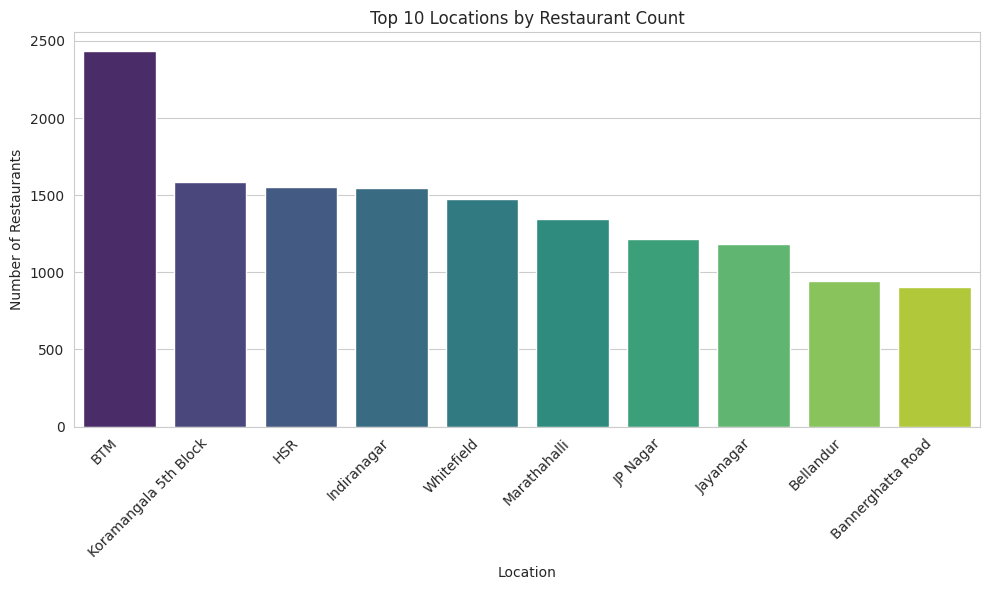

In [7]:
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')
plt.title('Top 10 Locations by Restaurant Count')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2395207708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='magma')


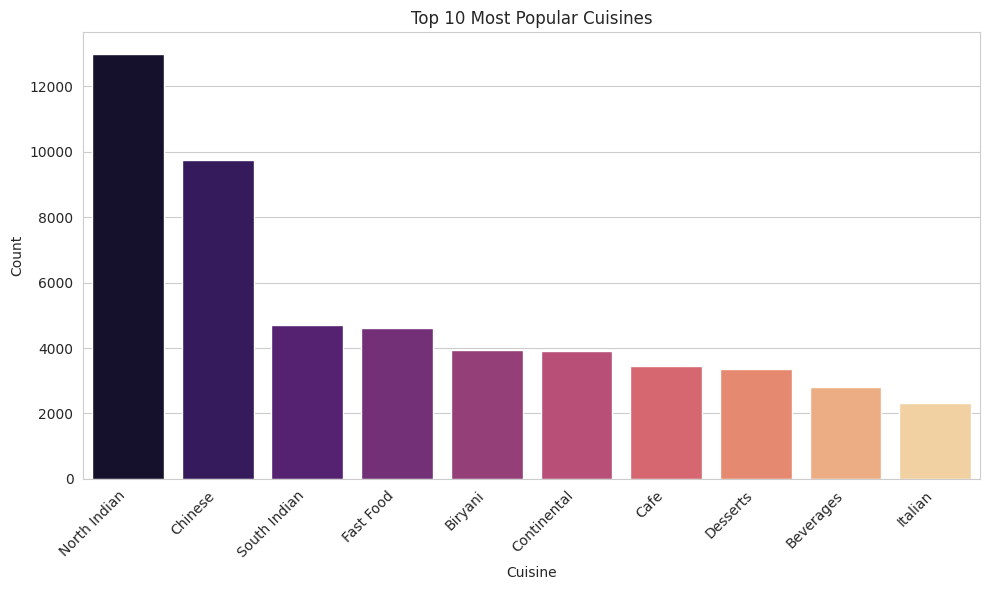

In [8]:
# Split the comma-separated cuisine strings and count individual items
cuisine_series = df['cuisines'].str.split(', ')
all_cuisines = [cuisine for sublist in cuisine_series.dropna() for cuisine in sublist]
cuisine_counts = pd.Series(all_cuisines).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='magma')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

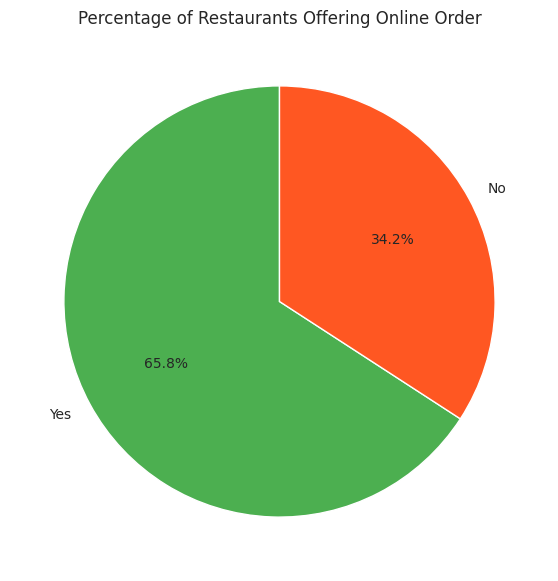

In [9]:
online_order_data = df['online_order'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(online_order_data.values, labels=online_order_data.index,
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#FF5722'])
plt.title('Percentage of Restaurants Offering Online Order')
plt.ylabel('')
plt.show()

/tmp/ipython-input-1249122432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='rate_cleaned', data=df, palette='pastel')


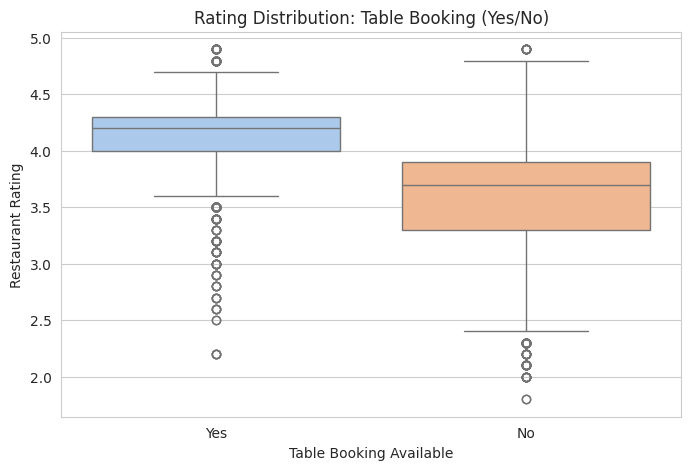

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='book_table', y='rate_cleaned', data=df, palette='pastel')
plt.title('Rating Distribution: Table Booking (Yes/No)')
plt.xlabel('Table Booking Available')
plt.ylabel('Restaurant Rating')
plt.show()

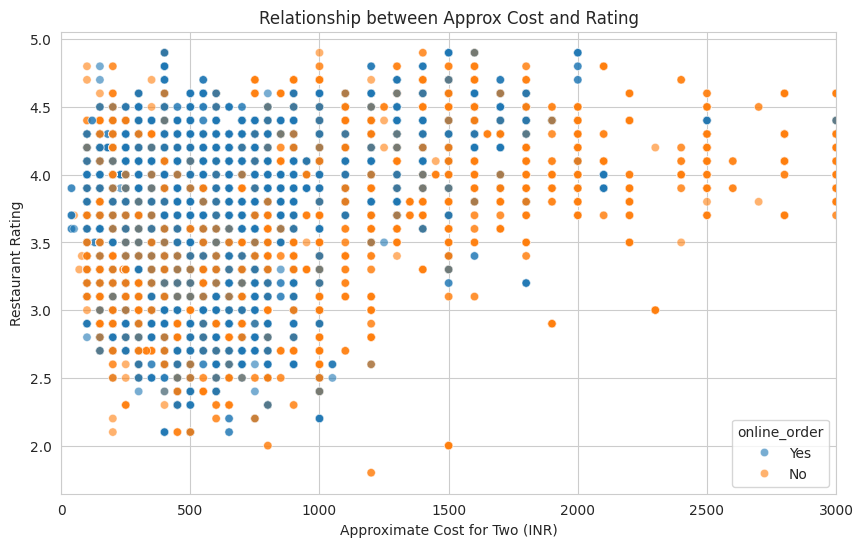

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_cleaned', y='rate_cleaned', data=df,
                hue='online_order',
                alpha=0.6)
plt.title('Relationship between Approx Cost and Rating')
plt.xlabel('Approximate Cost for Two (INR)')
plt.ylabel('Restaurant Rating')
plt.xlim(0, 3000) # Limits the x-axis to a common range for better viewing
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
